<a href="https://colab.research.google.com/github/ruthika11/ipython-notebook-examples/blob/master/HR_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Questions:**
Department in this document means the column "sales".

**1**.How many employees in each of the department (use column "sales")      
Output:
sales,num_employees

**2**.Among employees who left, get the department wise (use column "sales"), number of employees and rank them.  
Output:
sales,num_employees,rank

**3**.Average number of years (time_spend_company) and average number of monthly hours (average_monthly_hours) for the employees left and not left under each department. Sort the value by sales.  
Output:
left,sales,avg_time_spend_company,avg_average_monthly_hours

**4**.Under each department, what is the minimum and maximum for both left and not left employees related to time_spend_company and average_monthly_hours. Sort the value by sales.  
Output:
left,sales,min_time_spend_company,max_time_spend_company,min_average_monthly_hours,max_average_monthly_hours

**5**.Under each department, what is the minimum, maximum, average on last evaluation (last_evaluation) and satisfaction level (satisfaction_level) for both left and not left. Sort the value by sales.     
Output:  
left,sales,min_last_evaluation,max_last_evaluation,avg_last_evaluation, min_satisfaction_level, max_satisfaction_level,avg_satisfaction_level

**6**.Under each department, what is the count on work accidents (work_accident) and promotion for the last 5 years (promotion_last_5years) for both left and not left. Sort the value by sales.
Output:
left,sales,count_work_accident,count_promotion_last_5years

**7**.Bring the output from question 3-6 above.

Output:
left,sales,avg_time_spend_company,avg_average_monthly_hours,min_time_spend_company,max_time_spend_company,min_average_monthly_hours, max_average_monthly_hours,min_last_evaluation,max_last_evaluation,avg_last_evaluation,min_satisfaction_level, max_satisfaction_level, avg_satisfaction_level,count_work_accident,count_promotion_last_5years

**8**.Using output from the question 7 above, plot them as a grouped bar chart (similar to this or see group bar chart below) with seaborn. There must be two bars, one bar representing left and another for not left. This plot is for each unique department values in column “sales.”

X-axis => left or not left  
Y-axis => avg_time_spend_company (for each unique department values in column "sales"). This is the average calculated from "time_spend_company"

**9**.For output of 3, plot heat map as shown in the image following with the numbers. One approach is to use seaborn





In [ ]:
import pandas as pd
import csv
from google.colab import drive
drive.mount("/content/drive/")
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv(r"/content/drive/MyDrive/HR_comma_sep.csv")

In [39]:
def pretty_print(df, n):
   print(tabulate(df.head(n), headers="keys", tablefmt="psql"))


# 1.How many employees in each of the department (use column "sales")
 **Output**: **sales**,**num_employees**

In [40]:
no_of_emp = df.groupby(["sales"]).size().to_frame("num_employees").reset_index()
no_of_emp1 = no_of_emp.sort_values(by = ["num_employees"], ascending = True)
pretty_print(no_of_emp1,10)

+----+-------------+-----------------+
|    | sales       |   num_employees |
|----+-------------+-----------------|
|  4 | management  |             630 |
|  3 | hr          |             739 |
|  2 | accounting  |             767 |
|  1 | RandD       |             787 |
|  5 | marketing   |             858 |
|  6 | product_mng |             902 |
|  0 | IT          |            1227 |
|  8 | support     |            2229 |
|  9 | technical   |            2720 |
|  7 | sales       |            4140 |
+----+-------------+-----------------+


# 2.Among employees who left, get the department wise (use column "sales"), number of employees and rank them.
**Output**: **sales**,**num_employees**,**rank**

In [41]:
no_of_emp_left = df.groupby(["sales"])["left"].sum().to_frame("num_employees").reset_index()
no_of_emp_left = no_of_emp_left.sort_values(by = "num_employees", ascending = False)
no_of_emp_left["Rank"] = no_of_emp_left["num_employees"].rank(ascending = False)
pretty_print(no_of_emp_left,10)

+----+-------------+-----------------+--------+
|    | sales       |   num_employees |   Rank |
|----+-------------+-----------------+--------|
|  7 | sales       |            1014 |      1 |
|  9 | technical   |             697 |      2 |
|  8 | support     |             555 |      3 |
|  0 | IT          |             273 |      4 |
|  3 | hr          |             215 |      5 |
|  2 | accounting  |             204 |      6 |
|  5 | marketing   |             203 |      7 |
|  6 | product_mng |             198 |      8 |
|  1 | RandD       |             121 |      9 |
|  4 | management  |              91 |     10 |
+----+-------------+-----------------+--------+


# 3.Average number of years (time_spend_company) and average number of monthly hours (average_monthly_hours) for the employees left and not left under each department. Sort the value by sales.
**Output**: **left**,**sales**,**avg_time_spend_company**,**avg_average_monthly_hours**

In [42]:
df_avg_time = df.groupby(["left","sales"])["time_spend_company"].agg(avg_time_spend_company = "mean").reset_index()
df_avg_time1 = df.groupby(["left","sales"])["average_montly_hours"].agg(avg_average_monthly_hours = "mean").reset_index()
df_avg_time_mer = pd.merge(df_avg_time,df_avg_time1, how = "left")
pretty_print(df_avg_time_mer,25)

+----+--------+-------------+--------------------------+-----------------------------+
|    |   left | sales       |   avg_time_spend_company |   avg_average_monthly_hours |
|----+--------+-------------+--------------------------+-----------------------------|
|  0 |      0 | IT          |                  3.35639 |                     198.887 |
|  1 |      0 | RandD       |                  3.25225 |                     198.952 |
|  2 |      0 | accounting  |                  3.42451 |                     199.037 |
|  3 |      0 | hr          |                  3.19275 |                     199.25  |
|  4 |      0 | management  |                  4.39518 |                     200.234 |
|  5 |      0 | marketing   |                  3.48092 |                     198.889 |
|  6 |      0 | product_mng |                  3.33097 |                     197.766 |
|  7 |      0 | sales       |                  3.4437  |                     199.572 |
|  8 |      0 | support     |              

# 4.Under each department, what is the minimum and maximum for both left and not left employees related to time_spend_company and average_monthly_hours. Sort the value by sales.
**Output**: **left**,**sales**,**min_time_spend_company**,**max_time_spend_company**,**min_average_monthly_hours**,**max_average_monthly_hours**

In [43]:
df_timespend_avgmonthly = df.groupby(["left","sales"])\
    .agg({"time_spend_company" : ["min","max"],"average_montly_hours" : ["min","max"]}).reset_index()
df_timespend_avgmonthly.columns = ["left","sales","min_time_spend_company","max_time_spend_company",\
                                   "min_average_monthly_hours","max_average_monthly_hours"]
pretty_print(df_timespend_avgmonthly,20)


+----+--------+-------------+--------------------------+--------------------------+-----------------------------+-----------------------------+
|    |   left | sales       |   min_time_spend_company |   max_time_spend_company |   min_average_monthly_hours |   max_average_monthly_hours |
|----+--------+-------------+--------------------------+--------------------------+-----------------------------+-----------------------------|
|  0 |      0 | IT          |                        2 |                       10 |                          96 |                         287 |
|  1 |      0 | RandD       |                        2 |                        8 |                          98 |                         287 |
|  2 |      0 | accounting  |                        2 |                       10 |                          97 |                         285 |
|  3 |      0 | hr          |                        2 |                        8 |                          98 |                       

# 5.Under each department, what is the minimum, maximum, average on last evaluation (last_evaluation) and satisfaction level (satisfaction_level) for both left and not left. Sort the value by sales.
**Output**:
 **left**,**sales,min_last_evaluation,max_last_evaluation,avg_last_evaluationbold , min_satisfaction_level**, **max_satisfaction_level**,**avg_satisfaction_level**

In [44]:
df_last_level = df.groupby(["left","sales"])\
      .agg({"last_evaluation":["min","max","mean"],"satisfaction_level":["min","max","mean"]}).reset_index()
df_last_level.columns = ["left","sales","min_last_evaluation","max_last_evaluation",\
                         "avg_last_evaluation","min_satisfaction_level","max_satisfaction_level","avg_satisfaction_level"]
pretty_print(df_last_level,20)

+----+--------+-------------+-----------------------+-----------------------+-----------------------+--------------------------+--------------------------+--------------------------+
|    |   left | sales       |   min_last_evaluation |   max_last_evaluation |   avg_last_evaluation |   min_satisfaction_level |   max_satisfaction_level |   avg_satisfaction_level |
|----+--------+-------------+-----------------------+-----------------------+-----------------------+--------------------------+--------------------------+--------------------------|
|  0 |      0 | IT          |                  0.37 |                     1 |              0.71305  |                     0.12 |                     1    |                 0.67717  |
|  1 |      0 | RandD       |                  0.36 |                     1 |              0.706081 |                     0.12 |                     1    |                 0.653799 |
|  2 |      0 | accounting  |                  0.36 |                     1 |        

# 6.Under each department, what is the count on work accidents (work_accident) and promotion for the last 5 years (promotion_last_5years) for both left and not left. Sort the value by sales.
**Output**: **left**,**sales**,**count_work_accident**,**count_promotion_last_5years**

In [45]:
df_accident_promotion = df.groupby(["left","sales"])\
            .agg({"Work_accident" : ["sum"],"promotion_last_5years" : ["sum"]}).reset_index()
df_accident_promotion.columns = ["left","sales","count_work_accident","count_promotion_last_5years"]
pretty_print(df_accident_promotion,20)

+----+--------+-------------+-----------------------+-------------------------------+
|    |   left | sales       |   count_work_accident |   count_promotion_last_5years |
|----+--------+-------------+-----------------------+-------------------------------|
|  0 |      0 | IT          |                   155 |                             0 |
|  1 |      0 | RandD       |                   124 |                            27 |
|  2 |      0 | accounting  |                    87 |                            14 |
|  3 |      0 | hr          |                    82 |                            15 |
|  4 |      0 | management  |                    98 |                            66 |
|  5 |      0 | marketing   |                   128 |                            43 |
|  6 |      0 | product_mng |                   123 |                             0 |
|  7 |      0 | sales       |                   541 |                            93 |
|  8 |      0 | support     |                   314 | 

# 7.Bring the output from question 3-6 above.

**Output: left,sales,avg_time_spend_company,avg_average_monthly_hours,min_time_spend_company,max_time_spend_company,min_average_monthly_hours, max_average_monthly_hours,min_last_evaluation,max_last_evaluation,avg_last_evaluation,min_satisfaction_level, max_satisfaction_level, avg_satisfaction_level,count_work_accident,count_promotion_last_5years**

In [46]:
output1 = pd.merge(df_avg_time_mer,df_timespend_avgmonthly)
output2 = pd.merge(df_last_level,df_accident_promotion)
output = pd.merge(output1,output2)
pretty_print(output,20)

+----+--------+-------------+--------------------------+-----------------------------+--------------------------+--------------------------+-----------------------------+-----------------------------+-----------------------+-----------------------+-----------------------+--------------------------+--------------------------+--------------------------+-----------------------+-------------------------------+
|    |   left | sales       |   avg_time_spend_company |   avg_average_monthly_hours |   min_time_spend_company |   max_time_spend_company |   min_average_monthly_hours |   max_average_monthly_hours |   min_last_evaluation |   max_last_evaluation |   avg_last_evaluation |   min_satisfaction_level |   max_satisfaction_level |   avg_satisfaction_level |   count_work_accident |   count_promotion_last_5years |
|----+--------+-------------+--------------------------+-----------------------------+--------------------------+--------------------------+-----------------------------+----------

# 8.Using output from the question 7 above, plot them as a grouped bar chart (similar to this or see group bar chart below) with seaborn. There must be two bars, one bar representing left and another for not left. This plot is for each unique department values in column “sales.”

X-axis => left or not left

Y-axis => avg_time_spend_company (for each unique department values in column "sales"). This is the average calculated from "time_spend_company"

Text(0.5, 1.0, 'Bar Chart')

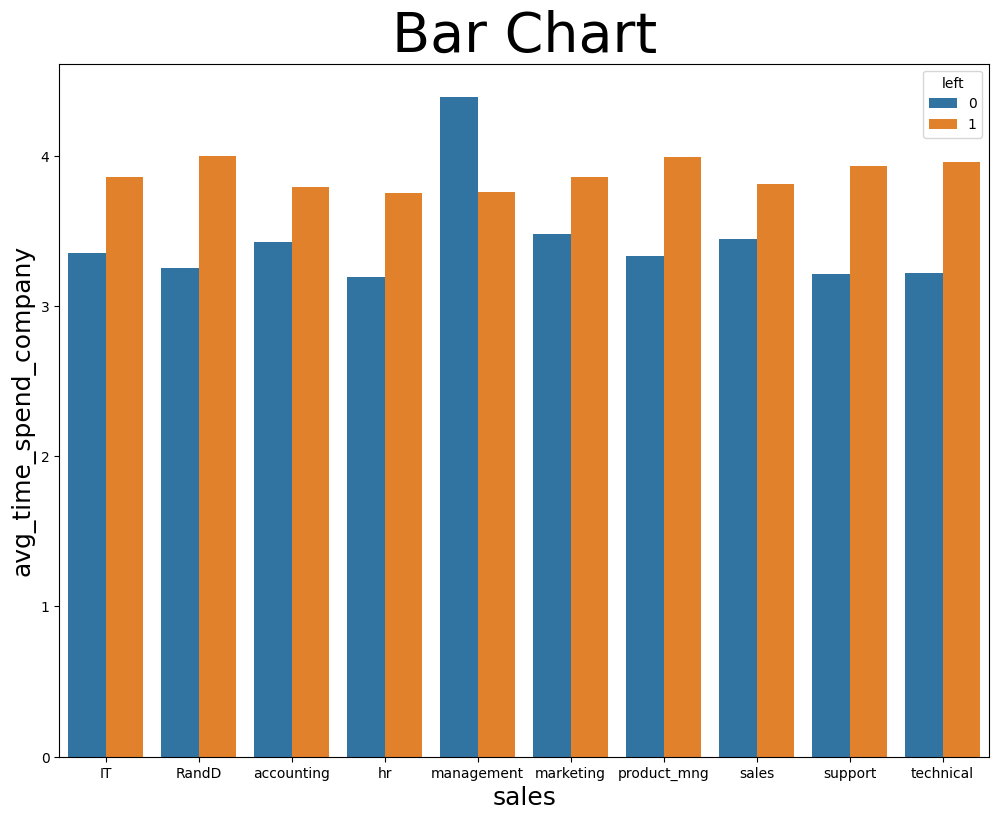

In [47]:
plt.figure(figsize = (12,9))
sns.barplot(x = "sales", y = "avg_time_spend_company",hue = "left",data = output)
plt.xlabel("sales", size = 18)
plt.ylabel("avg_time_spend_company", size = 18)
plt.title("Bar Chart",size = 40)

# 9.For output of 3, plot heat map as shown in the image following with the numbers. One approach is to use seaborn


<ipython-input-63-462e9463ddf7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_avg_time_mer.corr(), cmap ="YlGnBu", annot = True)


<Axes: >

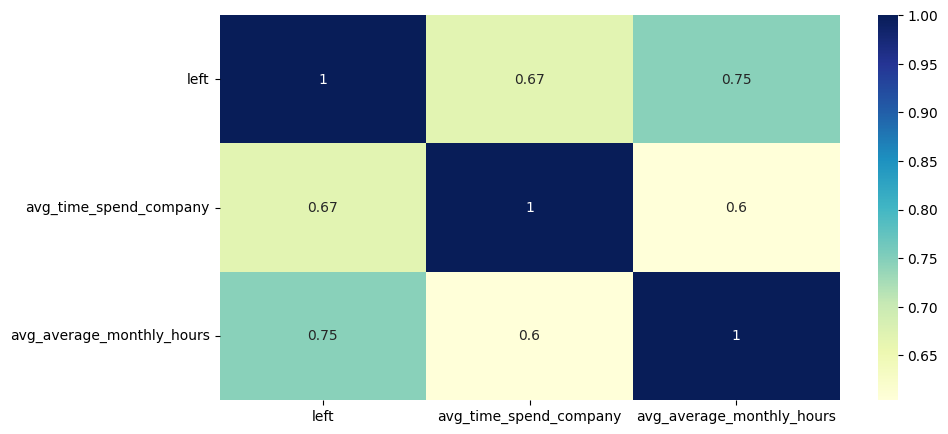

In [63]:
plt.figure(figsize = (10,5))
sns.heatmap(df_avg_time_mer.corr(), cmap ="YlGnBu", annot = True)

In [69]:
df_avg_time_mer.style.background_gradient(cmap = "YlGnBu").set_properties(**{"font-size" : "15px"})

,left,sales,avg_time_spend_company,avg_average_monthly_hours
0,0,IT,3.356394,198.886792
1,0,RandD,3.252252,198.951952
2,0,accounting,3.424512,199.037300
3,0,hr,3.192748,199.250000
4,0,management,4.395176,200.233766
5,0,marketing,3.480916,198.888550
6,0,product_mng,3.330966,197.765625
7,0,sales,3.443698,199.571657
8,0,support,3.213859,199.140980
9,0,technical,3.222442,198.471083
